In [1]:
# Import des librairies nécessaires pour la classification
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Affectation du csv à une variable
datas = pd.read_csv("Social_Network_Ads.csv")

In [3]:
# Visualisation du csv
datas.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
# Visualiser les types des colonnes du dataframe
datas.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [5]:
# Verification des doublons dans le dataset
datas.duplicated().value_counts()

False    367
True      33
dtype: int64

In [6]:
# Vérification des données manquantes dans le csv
datas.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
# verification des dimensions du dataset
datas.shape

(400, 3)

In [8]:
# Division du dataset en deux variables X et Y.
X = datas.drop(["Purchased"], axis=1)
y = datas.Purchased

In [9]:
# Import de train_tes_split et segmentation en des variables train et test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=20)

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

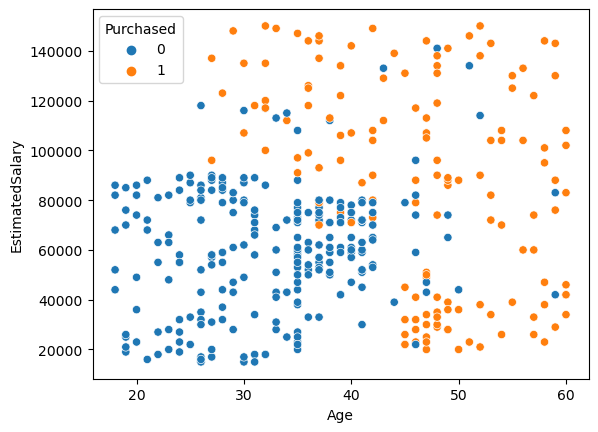

In [10]:
# Visualisation des colonnes Age et EstimatedSalary en fonction de Purchased
sns.scatterplot(x="Age", y="EstimatedSalary", data=datas, hue="Purchased")

In [11]:
# Standardisation
from sklearn.preprocessing import StandardScaler
sc =  StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
# Effectuer le SVM
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [13]:
y_train_predict = model.predict(X_train)

In [14]:
# Import du module pour la classification et la matrice de confusion
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_train, y_train_predict)
cm

array([[183,  16],
       [ 17,  84]], dtype=int64)

In [15]:
accuracy_score(y_train, y_train_predict)

0.89

<AxesSubplot:>

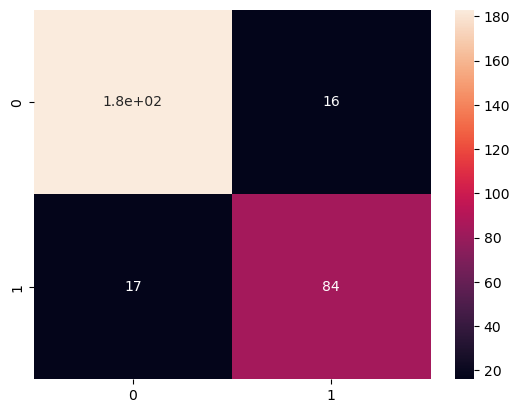

In [16]:
# Visualisation de la matrice de confusion
sns.heatmap(cm, annot=True)

In [17]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       199
           1       0.84      0.83      0.84       101

    accuracy                           0.89       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.89      0.89      0.89       300



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


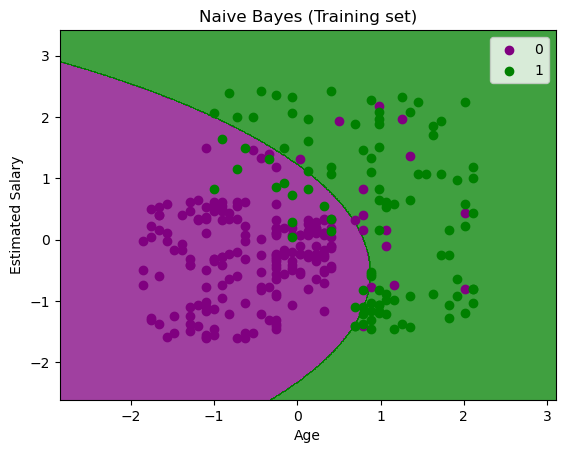

In [18]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
x_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('purple', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('purple', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


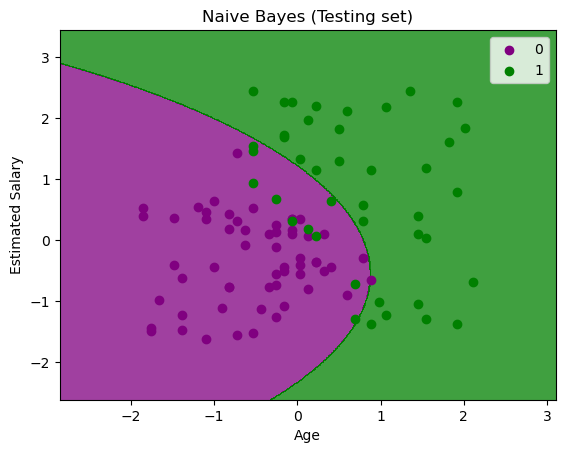

In [19]:
# Visualising the Testing set results
from matplotlib.colors import ListedColormap
x_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('purple', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('purple', 'green'))(i), label = j)
plt.title('Naive Bayes (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()